# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

### Importing all the necessary packages and getting the overview of the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail.csv")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


### Finding and dealing with missing data

In [8]:
print('Before filling the missing values: ', df.isnull().sum())
df['Description'] = df['Description'].fillna('Missing')
df['CustomerID'] = df['CustomerID'].fillna(0)
print('After filling the missing values: ', df.isnull().sum())

Before filling the missing values:  InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
After filling the missing values:  InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Sorting values according to the invoice date and exploring the contents of the dateframe

In [9]:
df.sort_values(by='InvoiceDate')
# Converting 'InvoiceDate' and 'CustomerID' columns to more convenient data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int64')

print(df.describe())
print(df.info())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   11476.974671
std       218.081158      96.759853    6777.908326
min    -80995.000000  -11062.060000       0.000000
25%         1.000000       1.250000   12352.000000
50%         3.000000       2.080000   14382.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-nu

### Finding the top 10 most often returned products

In [10]:
new_df = df.loc[df['InvoiceNo'].str.startswith('C')].sort_values(by='Quantity', ascending=True)
print(new_df.head(10))

       InvoiceNo StockCode                          Description  Quantity  \
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
61624    C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
160145   C550456     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
160144   C550456     21175          GIN + TONIC DIET METAL SIGN     -2000   
160143   C550456    85123A   WHITE HANGING HEART T-LIGHT HOLDER     -1930   
224419   C556522     22920                    HERB MARKER BASIL     -1515   
187609   C552995         M                               Manual     -1350   
160142   C550456    47566B               TEA TIME PARTY BUNTING     -1300   
390544   C570556     20971     PINK BLUE FELT CRAFT TRINKET BOX     -1296   

               InvoiceDate  UnitPrice  CustomerID         Country  
540422 2011-12-09 09:27:00       2.08       16446  United Kingdom  
61624  2011-01-1

According to the above table the most returned product is 'paper craft, little birdie' inquantity of 80995 pieces. Additionally, it can be seen that the most returned goods came from the Unite Kingdom.

### Finding profits earned from customers by country thorugh the year

                 Country       Total
1         United Kingdom  8187806.36
2            Netherlands   284661.54
3                   EIRE   263276.82
4                Germany   221698.21
5                 France   197403.90
6              Australia   137077.27
7            Switzerland    56385.35
8                  Spain    54774.58
9                Belgium    40910.96
10                Sweden    36595.91
11                 Japan    35340.62
12                Norway    35163.46
13              Portugal    29367.02
14               Finland    22326.74
15       Channel Islands    20086.29
16               Denmark    18768.14
17                 Italy    16890.51
18                Cyprus    12946.29
19               Austria    10154.32
20             Hong Kong    10117.04
21             Singapore     9120.39
22                Israel     7907.82
23                Poland     7213.14
24           Unspecified     4749.79
25                Greece     4710.52
26               Iceland     4310.00
2

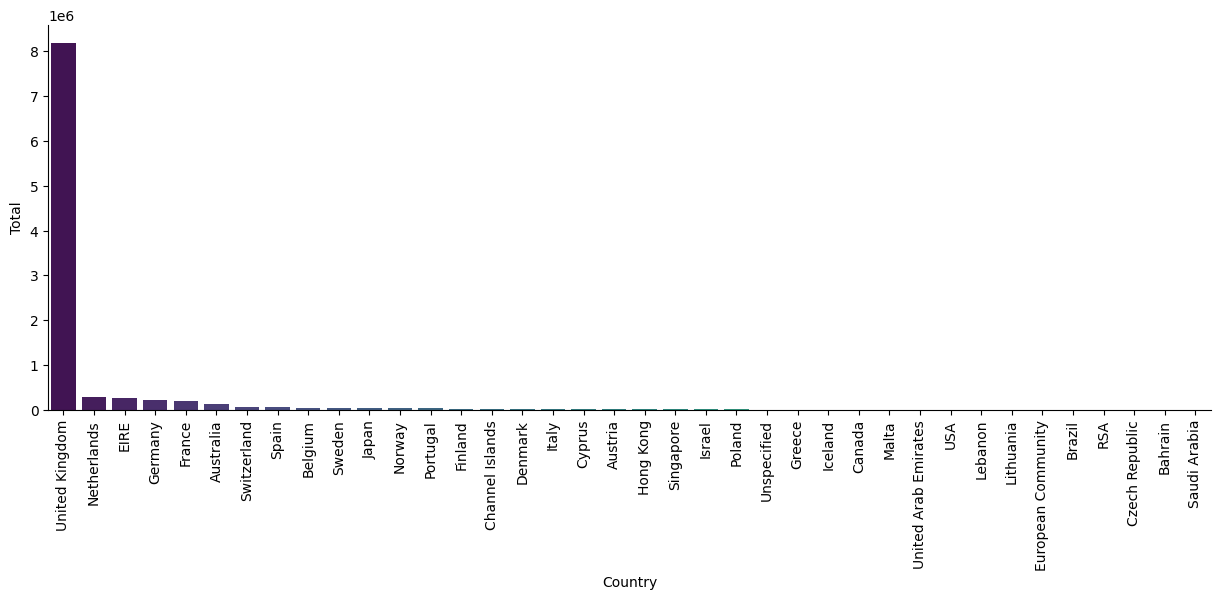

In [11]:
# Total profits by country through the year
df['Total'] = df['UnitPrice'] * df['Quantity']
total_by_country = round(df['Total'].groupby(df['Country']).sum(), 2)
total_by_country = total_by_country.sort_values(ascending=False)
total_by_country = total_by_country.reset_index()
total_by_country.index = total_by_country.index + 1
print(total_by_country)

fig, ax = plt.subplots(figsize=(15, 5))
sns.despine(fig)
sns.barplot(x=total_by_country['Country'], y=total_by_country['Total'], data=total_by_country, palette='viridis')
plt.xticks(rotation=90)
plt.show()

According to the table and the graph above, it is conspicuous that the United Kingdom is where most profit was made. Further, although very far behind, the UK is followed by the Netherladns, Ireland, Germany and France.

### Finding average weekly, monthly and quarterly profits earned from customers by country and visualizing the results

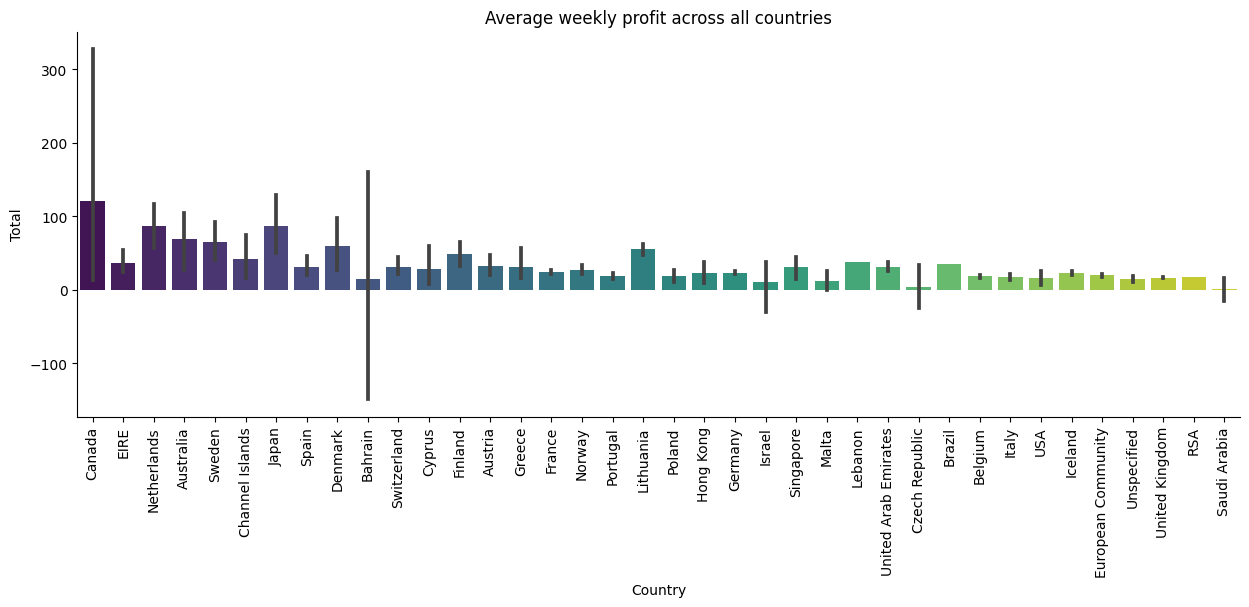

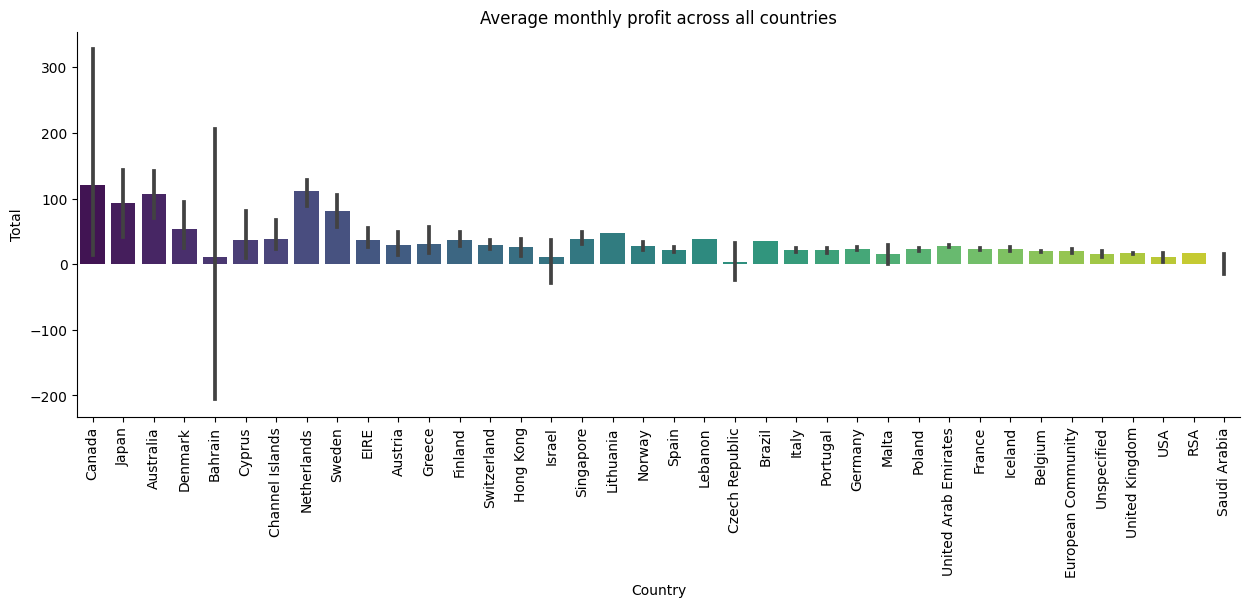

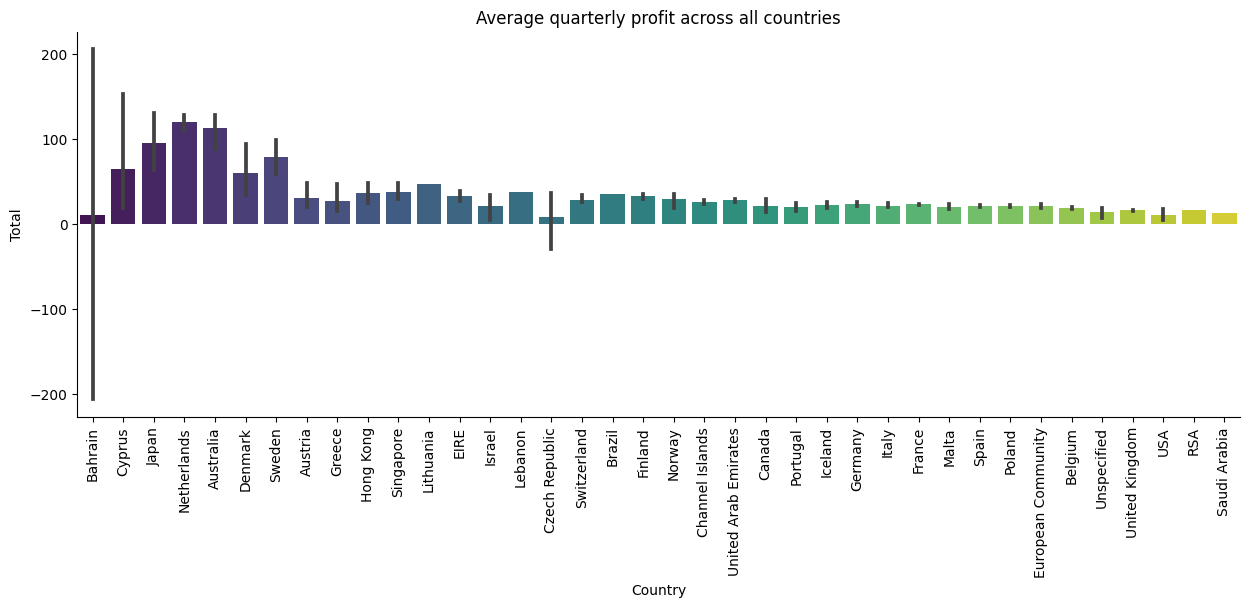

In [12]:
# Adding the week, month and quarter columns to the table
df['Week'] = df['InvoiceDate'].dt.week
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter

# Finding weekly profit by country
weekly_by_country = df.groupby(['Country', 'Week']).mean()
weekly_by_country = weekly_by_country.reset_index()
weekly_by_country.index = weekly_by_country.index + 1

# Plotting weekly profit by country
fig, ax = plt.subplots(figsize=(15, 5))
sns.despine(fig)
sns.barplot(x='Country', y='Total', data=weekly_by_country.sort_values(by='Total', ascending=False), palette='viridis').set(title='Average weekly profit across all countries')
plt.xticks(rotation=90)
plt.show()

# Finding monthly profit by country
monthly_by_country = df.groupby(['Country', 'Month']).mean()
monthly_by_country = monthly_by_country.reset_index()
monthly_by_country.index = monthly_by_country.index + 1

# Plotting weekly profit by country
fig, ax = plt.subplots(figsize=(15, 5))
sns.despine(fig)
sns.barplot(x='Country', y='Total', data=monthly_by_country.sort_values(by='Total', ascending=False), palette='viridis').set(title='Average monthly profit across all countries')
plt.xticks(rotation=90)
plt.show()

# Finding quarterly profit by country
quarterly_by_country = df.groupby(['Country', 'Quarter']).mean()
quarterly_by_country = quarterly_by_country.reset_index()
quarterly_by_country.index = quarterly_by_country.index + 1

# Plotting weekly profit by country
fig, ax = plt.subplots(figsize=(15, 5))
sns.despine(fig)
sns.barplot(x='Country', y='Total', data=quarterly_by_country.sort_values(by='Total', ascending=False), palette='viridis').set(title='Average quarterly profit across all countries')
plt.xticks(rotation=90)
plt.show()

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).